In [1]:
import os
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import snapfish2 as sf
from utils.data import DataTree
dtree = DataTree("../data")
importlib.reload(sf)

<module 'snapfish2' from '/Users/redfishhh/Documents/research/MultiplexedFISH/SnapFISH2/snapfish2/__init__.py'>

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
dtree["murphy_ng_2024"].keys()

dict_keys(['diff', 'dTAG', 'control', 'control2i', 'brain'])

In [34]:
loader1 = sf.pp.FOF_CT_Loader({rep: dtree["murphy_ng_2024","dTAG",rep,"trace"]
                               for rep in ["rep1", "rep2"]})
adata1 = loader1.create_adata("chr6")[:,:60]
loader2 = sf.pp.FOF_CT_Loader({rep: dtree["murphy_ng_2024","control",rep,"trace"]
                               for rep in ["rep1", "rep2"]})
adata2 = loader2.create_adata("chr6")[:,:60]
# loader3 = sf.pp.FOF_CT_Loader({rep: dtree["murphy_ng_2024","control2i",rep,"trace"]
#                                for rep in ["rep1", "rep2"]})
# c = ["Spot_ID", "X", "Y", "Z", "Chrom", "Chrom_Start", "Chrom_End", "Trace_ID"]
# for k, v in loader3.info.items():
#     v["columns"] = c
# adata3 = loader3.create_adata("chr6")
adata1

View of AnnData object with n_obs × n_vars = 1614 × 60
    var: 'Chrom_Start', 'Chrom_End'
    uns: 'Chrom'
    layers: 'X', 'Y', 'Z'

In [35]:
sf.pp.axis_weight(adata1, False)

Axis X sd: 19296.968
Axis Y sd: 19086.117
Axis Z sd: 596.213


array([9.52767173e-04, 9.73934580e-04, 9.98073298e-01])

In [85]:
d1d = adata3.var["Chrom_Start"].values

In [88]:
d1d

array([52090001, 52095001, 52100001, 52105001, 52110001, 52115001,
       52120001, 52125001, 52130001, 52135001, 52140001, 52145001,
       52150001, 52155001, 52160001, 52165001, 52170001, 52175001,
       52180001, 52185001, 52190001, 52195001, 52200001, 52205001,
       52210001, 52215001, 52220001, 52225001, 52230001, 52235001,
       52240001, 52245001, 52250001, 52255001, 52260001, 52265001,
       52270001, 52275001, 52280001, 52285001, 52290001, 52295001,
       52300001, 52305001, 52310001, 52315001, 52320001, 52325001,
       52330001, 52335001, 52340001, 52345001])

In [86]:
d1d[1:] - d1d[:-1]

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
       5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
       5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
       5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
       5000, 5000, 5000, 5000, 5000, 5000, 5000])

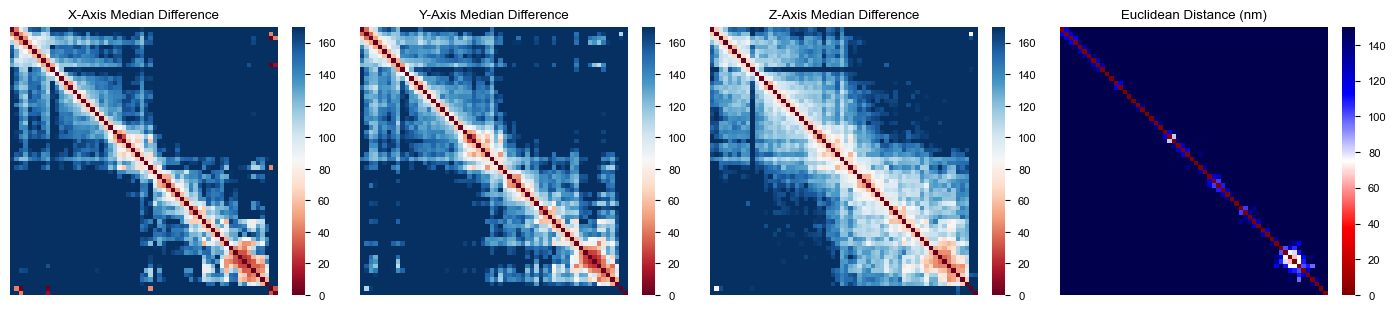

In [12]:
from utils.maps import dist_diff_heatmaps
fig, axes = plt.subplots(1, 4, figsize=(14, 3))
dist_diff_heatmaps(axes, adata1, vmax1=170)

In [ ]:
sf.pp.filter_normalize(adata1)
caller = sf.tl.TADCaller(window=3e4, tree=False)
res = caller.call_tads(adata1)
bedpe = caller.to_bedpe(res)

/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/utils/eval.py:22: ImplicitModificationWarning: Setting element `.varp['raw_var_X']` of view, initializing view as actual.
  adata.varp[f"raw_var_{v}"] = med_sq[i]


In [ ]:
bedpe

,c1,s1,e1,c2,s2,e2,stat1,stat2,level,idx1,idx2
0,chr6,52090001,52095001,chr6,52240001,52245001,NaN,3.156481e+13,0,0,30
1,chr6,52240001,52245001,chr6,52285001,52290001,3.156481e+13,1.555987e+13,0,30,39
2,chr6,52285001,52290001,chr6,52300001,52305001,1.555987e+13,5.976212e+06,0,39,42
3,chr6,52300001,52305001,chr6,52320001,52325001,5.976212e+06,5.160532e+14,0,42,46
4,chr6,52320001,52325001,chr6,52740001,52745001,5.160532e+14,NaN,0,46,59


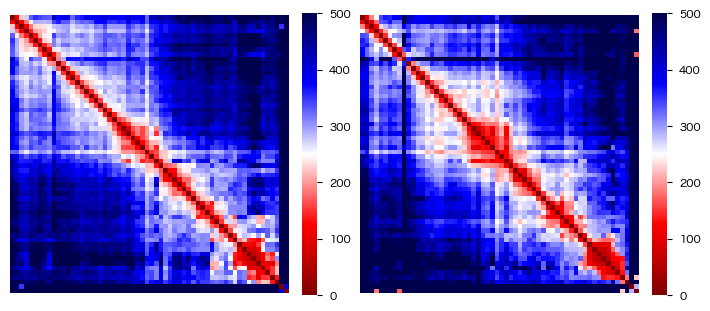

In [48]:
med_dist1 = sf.pp.median_pdist(adata1, inplace=False)
med_dist2 = sf.pp.median_pdist(adata2, inplace=False)
fig, axes = plt.subplots(1, 2, figsize=(7,3))
sf.pl.pairwise_heatmap(med_dist1, vmax=500, ax=axes[0])
sf.pl.pairwise_heatmap(med_dist2, vmax=500, ax=axes[1])

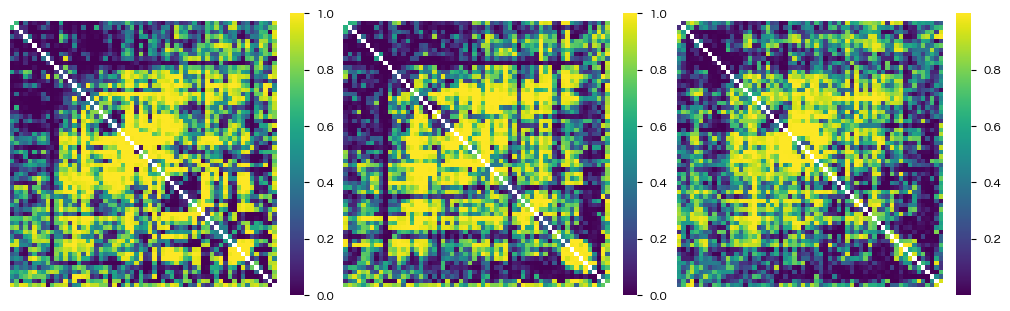

In [50]:
sf.pp.filter_normalize(adata1)
sf.pp.filter_normalize(adata2)
diff = sf.tl.DiffLoop(adata1, adata2)
pvals = diff.entry_pvals(adata1, adata2)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for a, b in zip(axes, pvals):
    sf.pl.pairwise_heatmap(b, ax=a, cmap="viridis")

In [53]:
from anndata import concat
sf.pp.axis_weight(concat([adata1, adata2]), inplace=False)

/opt/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


array([8.84506549e-04, 1.01857784e-03, 9.98096916e-01])

,c1,s1,e1,c2,s2,e2,stat,pval,fdr,candidate,label,summit
318,chr6,52115001,52120001,chr6,52235001,52240001,1.323355e+11,2.405187e-12,1.532104e-09,True,1.0,True


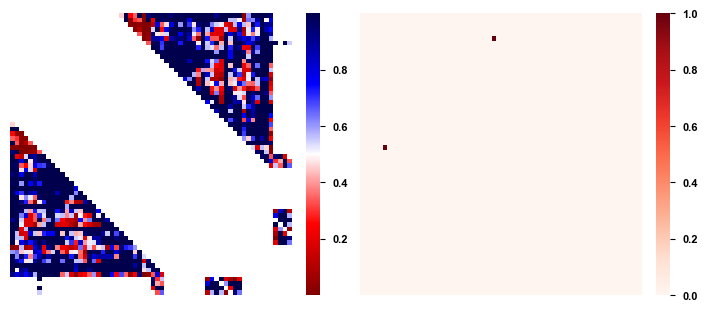

In [24]:
caller = sf.tl.LoopCaller(1e-4, cut_lo=5e3, gap=1e4, outer_cut=5e4)
res = caller.call_loops(adata)
df = caller.to_bedpe(res, adata)
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
sf.pl.pairwise_heatmap(res["fdr"], ax=axes[0])
sf.pl.pairwise_heatmap(res["summit"], ax=axes[1], cmap="Reds")
df[df["summit"]]

In [ ]:
sf.pl.background_model(10, 10, )

In [ ]:
from matplotlib.colors import Colormap

In [115]:
plt.colormaps

In [119]:
import scanpy as sc

In [123]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [133]:
sns.set_context('paper')
plt.style.use('seaborn-v0_8-white')

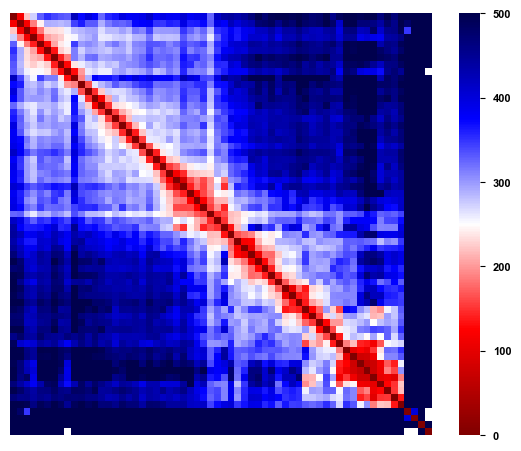

In [50]:
med_dist = sf.pp.median_pdist(adata, inplace=False)
sf.pl.pairwise_heatmap(med_dist, vmax=500)

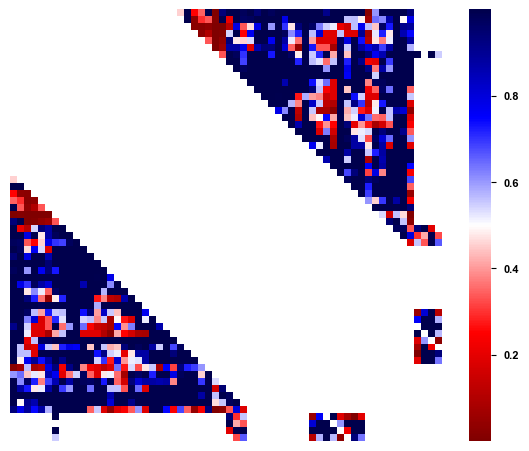

In [13]:
sf.pp.FOF_CT_Loader(
    dtree["messina_nc_2023", "nc12"],
    voxel_ratio={c: 1000 for c in "XYZ"}
).create_adata("chr2L")

AnnData object with n_obs × n_vars = 1247 × 35
    var: 'Chrom_Start', 'Chrom_End'
    uns: 'Chrom'
    layers: 'X', 'Y', 'Z'

In [7]:
dtree["messina_nc_2023"]

{'nc12': '4DNFIWYGCXD7.csv', 'nc14': '4DNFI1T9J25Q.csv'}

[0.46922781 0.45299943 0.07777276]


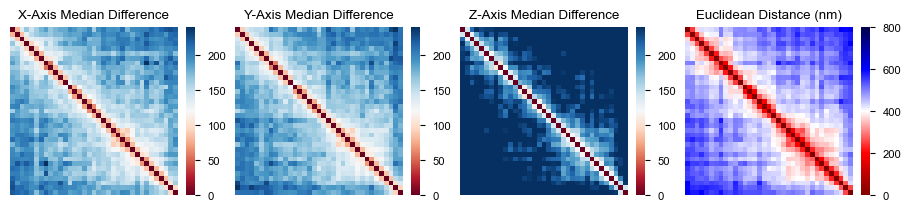

In [3]:
loader = sf.pp.FOF_CT_Loader(
    dtree["messina_nc_2023", "nc14"],
    voxel_ratio={c: 1000 for c in "XYZ"}
)
adata = loader.create_adata("chr2L")
print(sf.pp.axis_weight(adata, inplace=False))

from utils.maps import dist_diff_heatmaps
fig, axes = plt.subplots(1, 4, figsize=(9, 2))
dist_diff_heatmaps(axes, adata, 240, 800)

In [4]:
sf.pp.filter_normalize(adata)

In [17]:
d1d = adata.var.Chrom_Start.values
f"{np.mean(d1d[1:] - d1d[:-1])//1e3}Kb"

'12.0Kb'

(<Axes: >,
 <Axes: xlabel='Genomic Position (bp)', ylabel='FDR'>)

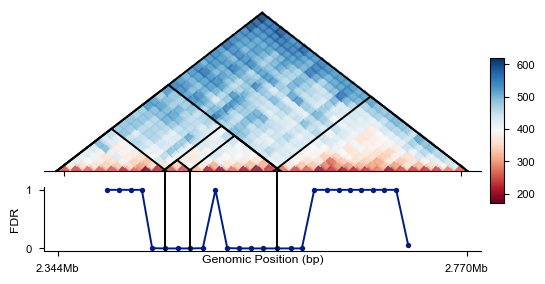

In [6]:
caller = sf.tl.TADCaller(.1, window=100e3)
fig = plt.figure(figsize=(5, 2.5))
sf.pl.triangle_domain_boundary(adata, caller, fig=fig, marker="D")